<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

#!pip install plotly
import plotly.express as px # high level interface
import plotly.graph_objects as go # lower level interface

In [2]:
# 5 pre-requisite rule
### 1) Every data should be numeric in nature, not in category
### 2) Data Type is correct or not - make sure you have DateTime column and Target variable (VWAP)
### 3) There should not be any missing data, if yes, first impute and then try to solve TSF
### 4) Data should be sequential order (DATETIME Columns) - TimeSeries always in an ascending order
### 5) We have to check whether in the given dataset - do we have Trend, Seasonality, Cyclicity and Irregular (Noise/Error)


In [3]:
# Creating pandas df
df = pd.read_csv('YahooFinance.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [5]:
df['Symbol'].value_counts()

,count
Symbol,
IOC,5306
CIPLA,5306
M&M,5306
ICICIBANK,5306
ONGC,5306
...,...
MUNDRAPORT,1023
TELCO,999
KOTAKMAH,502


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [8]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [15]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [9]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [14]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['VWAP']))
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))
print(sm.stats.durbin_watson(df['Volume']))
print(sm.stats.durbin_watson(df['High']))
print(sm.stats.durbin_watson(df['Low']))

0.0014277598023373546
0.0015870073457078119
0.0015201473988800853
-1.6285414945629082
0.0014694358123648094
0.0015302998074600996


In [12]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,2011-05-22 13:18:08.975815680,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,2006-07-03 00:00:00,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,2011-08-19 00:00:00,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,2016-06-24 00:00:00,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019


In [17]:
df.nunique()

,0
Date,5306
Symbol,65
Series,1
Prev Close,63729
Open,44298
High,49036
Low,51335
Last,48570
Close,63739
VWAP,138831


In [18]:
df1=df.copy()

In [19]:
df1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [20]:
df1.set_index('Date',inplace=True)

In [21]:
df1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [22]:
start_date = df1.index.min()
end_date = df1.index.max()
print("Start Date of Stocks:",start_date)
print("End Date of Stocks:",end_date)

Start Date of Stocks: 2000-01-03 00:00:00
End Date of Stocks: 2021-04-30 00:00:00


<Axes: xlabel='Date'>

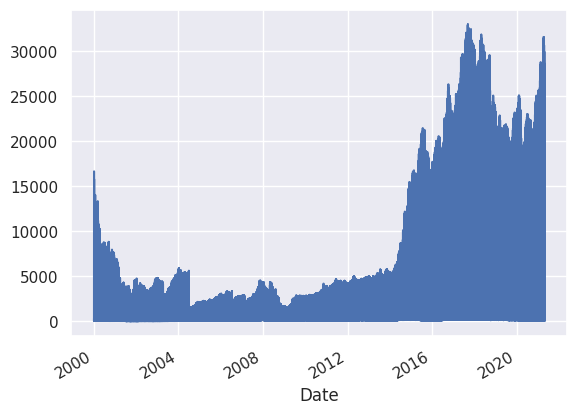

In [23]:
df1['VWAP'].plot()

In [24]:
df1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [25]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

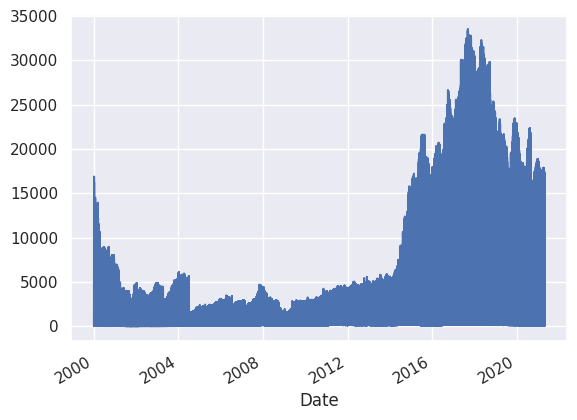

In [33]:
df1['High'].plot()

In [26]:
df1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [28]:
stock_name= 'IOC'

In [29]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172


In [30]:
df2=df[df['Symbol']==stock_name]

In [31]:
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
117186,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
117187,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
117188,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
117189,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
117190,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


In [32]:
df2['Symbol'].nunique()

1

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 117186 to 122491
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4797 non-null   float64   

In [34]:
df2['Date']=pd.to_datetime(df2['Date'])

In [35]:
df2.shape

(5306, 15)

<Axes: >

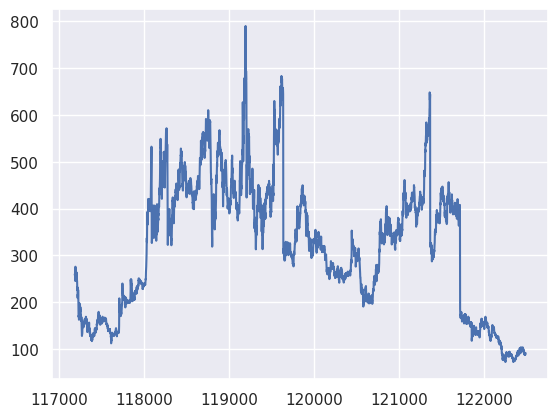

In [37]:
df2['VWAP'].plot()

In [38]:
df2['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Time_Stamp
117186,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN,2000-01-03
117187,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN,2000-01-04
117188,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN,2000-01-05
117189,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN,2000-01-06
117190,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN,2000-01-07


In [39]:
df2['Time_Stamp'] = pd.to_datetime(df2['Time_Stamp'])
df_final_model = df2.set_index('Time_Stamp')
df_final_model

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Time_Stamp,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,IOC,EQ,254.00,260.00,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,IOC,EQ,270.85,260.00,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2000-01-05,2000-01-05,IOC,EQ,264.40,264.90,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
2000-01-06,2000-01-06,IOC,EQ,261.30,258.00,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
2000-01-07,2000-01-07,IOC,EQ,260.10,259.90,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,IOC,EQ,88.05,88.70,88.80,87.75,88.20,88.20,88.28,7066681,6.238778e+13,31742.0,2065036.0,0.2922
2021-04-27,2021-04-27,IOC,EQ,88.20,88.20,89.10,88.20,88.90,88.85,88.76,8752415,7.768566e+13,36649.0,3038898.0,0.3472
2021-04-28,2021-04-28,IOC,EQ,88.85,89.20,89.55,89.00,89.30,89.40,89.29,6336704,5.657990e+13,28905.0,2147333.0,0.3389


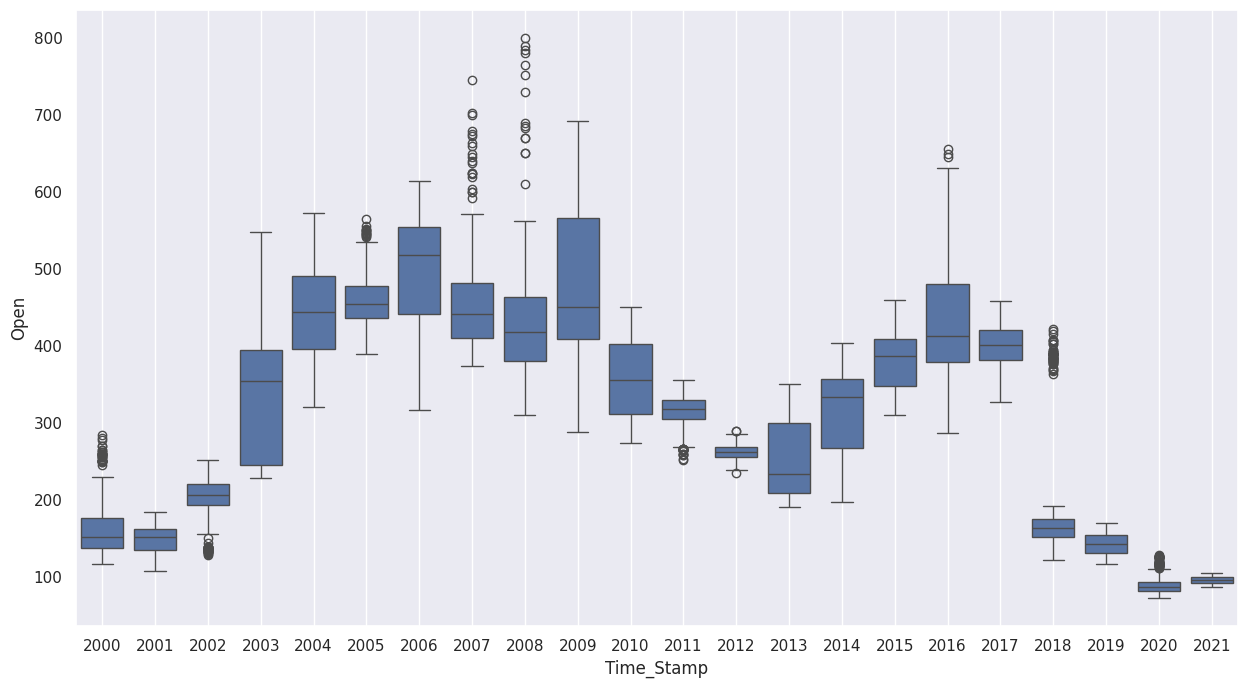

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year,y=df_final_model['Open'])
plt.grid()

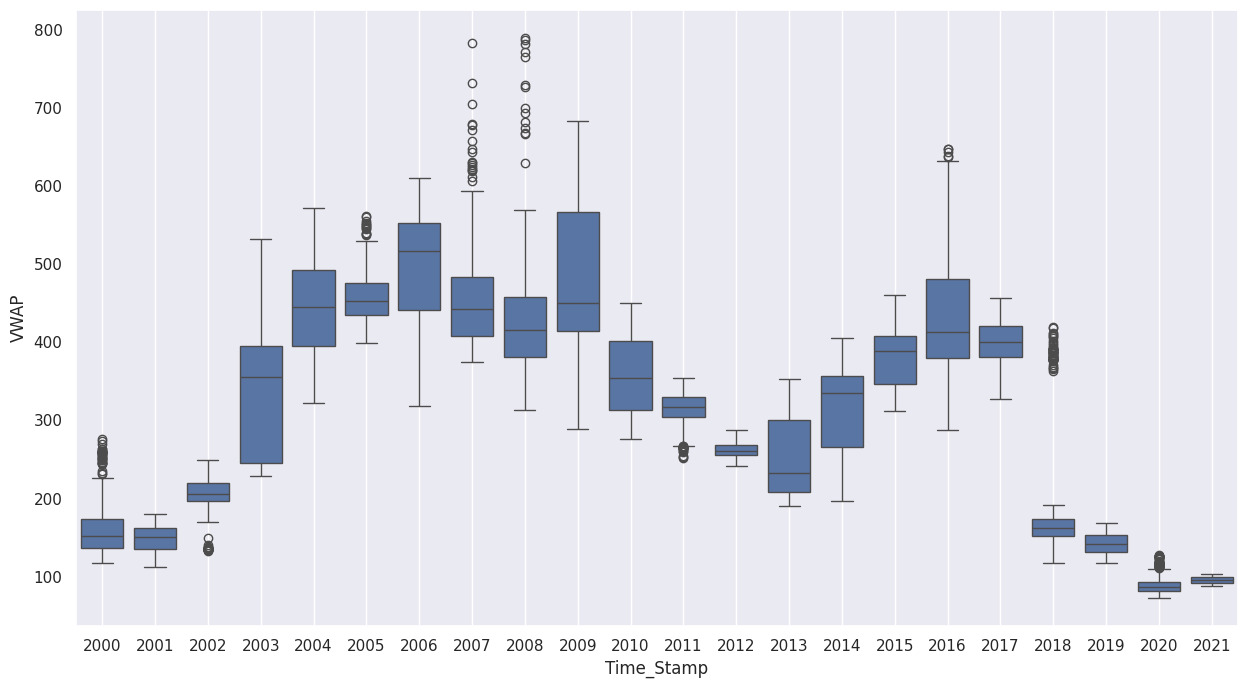

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_final_model.index.year, y=df_final_model['VWAP'] )
plt.grid()

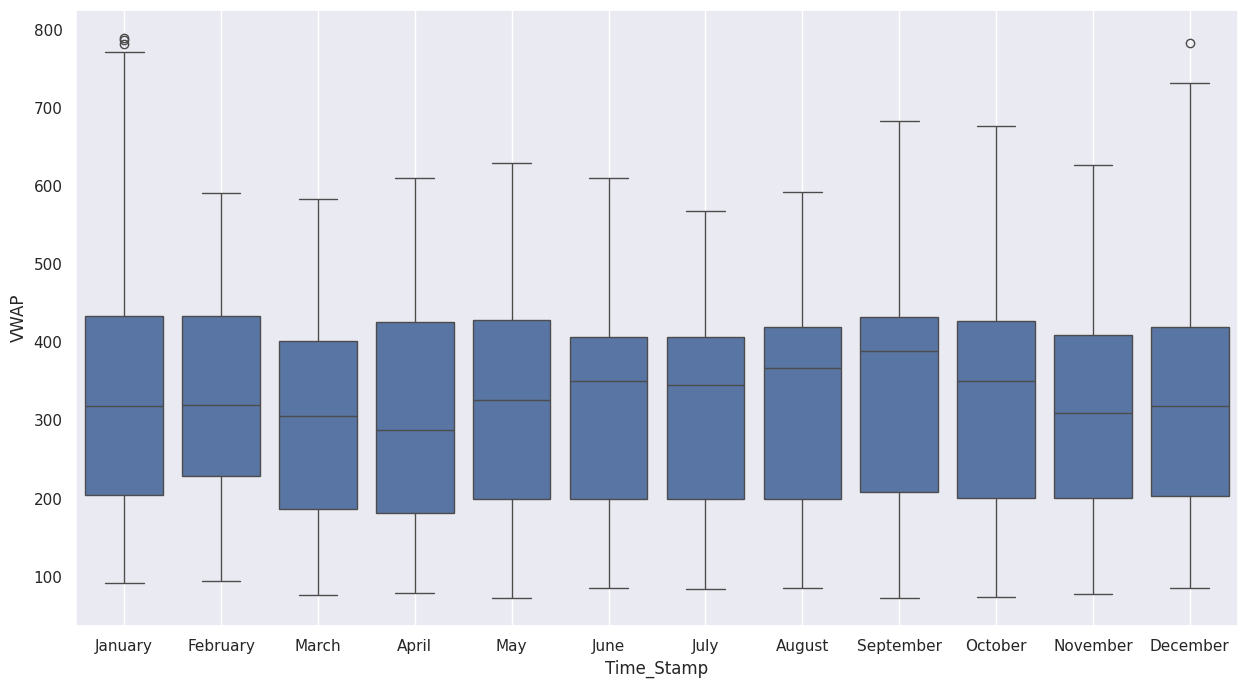

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_final_model.index.month_name(), y=df_final_model['VWAP'] )
plt.grid()

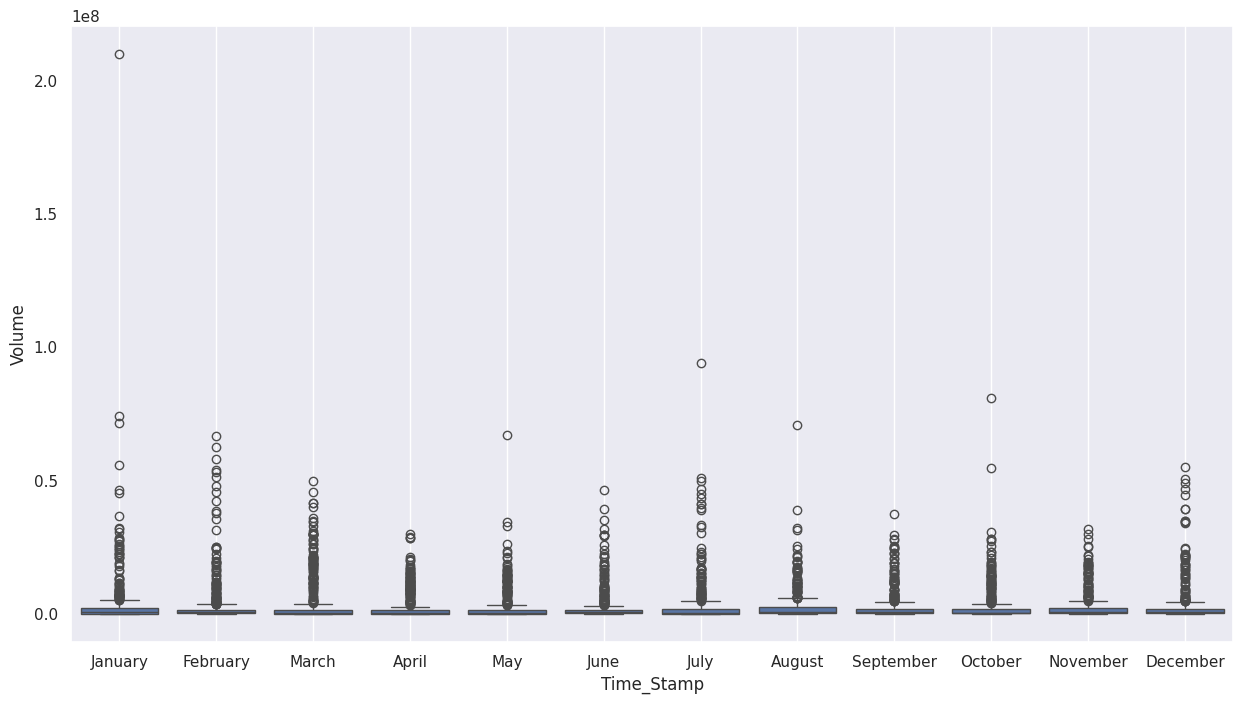

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_final_model.index.month_name(), y=df_final_model['Volume'] )
plt.grid()

In [48]:
df_final_model.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [49]:
df_final_model = df_final_model[['Date', 'Open', 'High', 'Low','Close', 'VWAP', 'Volume']]
df_final_model

,Date,Open,High,Low,Close,VWAP,Volume
Time_Stamp,,,,,,,
2000-01-03,2000-01-03,260.00,273.25,250.00,270.85,258.55,23700
2000-01-04,2000-01-04,260.00,268.00,254.10,264.40,259.80,24400
2000-01-05,2000-01-05,264.90,265.00,257.00,261.30,260.66,18900
2000-01-06,2000-01-06,258.00,263.00,256.05,260.10,259.81,18150
2000-01-07,2000-01-07,259.90,267.00,253.25,264.45,260.11,17650
...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,88.70,88.80,87.75,88.20,88.28,7066681
2021-04-27,2021-04-27,88.20,89.10,88.20,88.85,88.76,8752415
2021-04-28,2021-04-28,89.20,89.55,89.00,89.40,89.29,6336704


In [50]:
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2000-01-03 00:00:00
End Date of Stocks : 2021-04-30 00:00:00


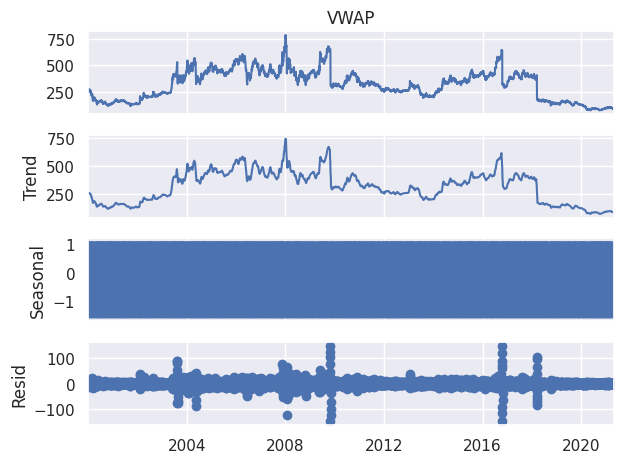

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(df_final_model['VWAP'], model='additive', period=12)
decompse.plot()
plt.show()

In [52]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid

print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
2000-01-10           NaN
2000-01-11    261.526250
2000-01-12    261.534167
2000-01-13    261.325833
2000-01-14    261.044167
2000-01-17    260.526667
2000-01-18    260.006667
Name: trend, dtype: float64 

Seasoanlity 
 Time_Stamp
2000-01-03    0.896277
2000-01-04    0.510918
2000-01-05    0.509207
2000-01-06    0.577733
2000-01-07    1.053876
2000-01-10   -0.236381
2000-01-11   -1.561285
2000-01-12   -1.068692
2000-01-13   -0.258704
2000-01-14   -0.236927
2000-01-17   -0.327044
2000-01-18    0.141020
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-10          NaN
2000-01-11   -14.334965
2000-01-12    -1.515475
2000-01-13    14.892871
2000-01-14    13.222760
2000-01-17     9.500377
2000-01-18    -0.027687
Name: r

In [ ]:
Split the data into training and test before building time series forecasting

In [53]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

,Date,Open,High,Low,Close,VWAP,Volume,Month,Year
Time_Stamp,,,,,,,,,
2000-01-03,2000-01-03,260.0,273.25,250.00,270.85,258.55,23700,1,2000
2000-01-04,2000-01-04,260.0,268.00,254.10,264.40,259.80,24400,1,2000
2000-01-05,2000-01-05,264.9,265.00,257.00,261.30,260.66,18900,1,2000
2000-01-06,2000-01-06,258.0,263.00,256.05,260.10,259.81,18150,1,2000
2000-01-07,2000-01-07,259.9,267.00,253.25,264.45,260.11,17650,1,2000


In [54]:
df_final_model.tail()

,Date,Open,High,Low,Close,VWAP,Volume,Month,Year
Time_Stamp,,,,,,,,,
2021-04-26,2021-04-26,88.70,88.80,87.75,88.20,88.28,7066681,4,2021
2021-04-27,2021-04-27,88.20,89.10,88.20,88.85,88.76,8752415,4,2021
2021-04-28,2021-04-28,89.20,89.55,89.00,89.40,89.29,6336704,4,2021
2021-04-29,2021-04-29,90.25,90.50,88.70,88.90,89.53,8957163,4,2021
2021-04-30,2021-04-30,88.60,93.10,88.00,90.85,91.47,29815698,4,2021


In [55]:
df_final_model.index.min()

Timestamp('2000-01-03 00:00:00')

In [56]:
df_final_model.index.max()

Timestamp('2021-04-30 00:00:00')

In [57]:
train_df = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2015-03-23')]

# training data means : 2000-01-03 to 2015-03-22
# test data means : 2015-03-23 to 2021-04-30
test_df = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2015-03-23')]

In [58]:
train_df.shape

(3795, 9)

In [59]:
train_final = train_df[['VWAP']]
test_final = test_df[['VWAP']]

In [60]:
train_final.head()

,VWAP
Time_Stamp,
2000-01-03,258.55
2000-01-04,259.80
2000-01-05,260.66
2000-01-06,259.81
2000-01-07,260.11


In [61]:
test_final.shape

(1511, 1)

In [62]:
test_final.head()

,VWAP
Time_Stamp,
2015-03-23,343.26
2015-03-24,347.01
2015-03-25,350.53
2015-03-26,351.43
2015-03-27,348.00


In [63]:
# To check Time Series is Stationary or not - this is mandatory steps
# please ensure your data should be stationary
# How will check it - Augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [64]:
adfuller(train_final['VWAP'])

(-3.083440701784115,
 0.027803169580779323,
 1,
 3793,
 {'1%': -3.432075212507756,
  '5%': -2.862302303994175,
  '10%': -2.5671757844911003},
 28353.973104031804)

In [65]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ['ADF Test', 'P-Value', '#Lags','No. of Observation']

    for i, j in zip(result, labels):
        print(j + "----->"+ str(i))

    if result[1] <= 0.05:
        print("Strong evidence against Null Hypothesis and my time series is Staionary")
    else:
        print("Weak Evidence against Null Hypothesis and my time series is Non-Stationary")

In [66]:
check_adftest(train_final['VWAP'])

Augmented Dickey Fuller Test
ADF Test----->-3.083440701784115
P-Value----->0.027803169580779323
#Lags----->1
No. of Observation----->3793
Strong evidence against Null Hypothesis and my time series is Staionary


In [67]:
# Since my time series is stationary so we are ready to build Time Series Forecasting

import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # Trend

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))] # Seasonality

print("Examples of parameters combinations for Model...........")
print("Model : {}{}".format(pdq[1], model_pdq[1]))
print("Model : {}{}".format(pdq[0], model_pdq[0]))
print("Model : {}{}".format(pdq[2], model_pdq[2]))
print("Model : {}{}".format(pdq[1], model_pdq[2]))

Examples of parameters combinations for Model...........
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 0)(0, 0, 0, 5)
Model : (0, 0, 2)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
